In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def density(r,Rs,p0):
    return p0/((r/Rs)*((1+(r/Rs))**2))

In [34]:
def plot(Rs,c):
    Rvir = c*Rs
    xs = np.linspace(0,Rvir,10000)[1:]
    ys = density(xs,Rs)
    plt.plot(xs/Rs,ys)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

In [49]:
def prob(r,Rvir,c):
    Rs = Rvir/c
    print(density(r,Rs))

0.25


In [63]:
def massDist(Rmax,Rvir,c):
    Rs = Rvir/c
    max_mass = 4*np.pi*(Rs**3)*((np.log((Rs+Rvir)/Rs))+(Rs/(Rs+Rvir))-1)
    return (4*np.pi*(Rs**3)*((np.log((Rs+Rmax)/Rs))+(Rs/(Rs+Rmax))-1))/max_mass

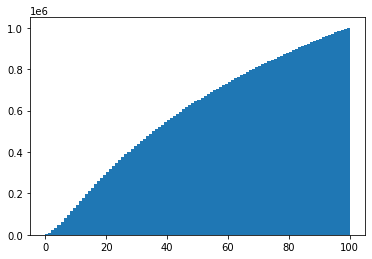

In [136]:
def sampleRadius(Rvir,c,nBins,nParticles):
    radiuses = np.linspace(0,Rvir,nBins)
    low = massDist(radiuses[:-1],Rvir,c)
    high = massDist(radiuses[1:],Rvir,c)
    dists = high-low
    mul = (1/np.min(dists))
    nRadiuses = np.round(dists * mul).astype(int)
    delta = radiuses[1]
    rSamples = []
    for n,low in zip(nRadiuses,radiuses[:-1]):
        rSamples += list(np.random.random(n)*delta+low)
    rSamples = np.array(rSamples)
    return np.random.choice(rSamples,size=nParticles,replace=False)

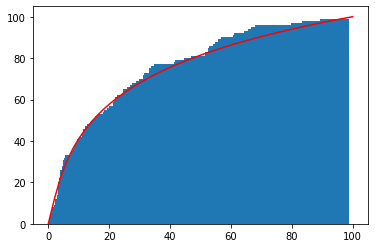

In [146]:
n = 100
c = 100
xs = np.linspace(0,100)
ys = massDist(xs,100,c) * n
plt.plot(xs,ys,color="red",zorder=1)
plt.hist(sampleRadius(100,c,10000,n),bins=1000,cumulative=True,zorder=0)
plt.show()

In [150]:
def massDist(Rmax,Rvir,c):
    Rs = Rvir/c
    max_mass = 4*np.pi*(Rs**3)*((np.log(1+c))-(c/(1+c)))
    return (4*np.pi*(Rs**3)*((np.log((Rs+Rmax)/Rs))+(Rs/(Rs+Rmax))-1))/max_mass

1.0
